In [1]:
import scipy.io
import pandas as pd
from sklearn.metrics import mean_squared_error
dataPath='../data/og/'
depth = scipy.io.loadmat(dataPath +'depth.mat')
time = scipy.io.loadmat(dataPath +'Vect_time.mat')
lb = scipy.io.loadmat(dataPath +'VectLB19922008.mat')

In [2]:
labels = [k[0] for k in lb['labels'][0] ]

In [3]:
# import matlab.engine
# eng = matlab.engine.start_matlab()
# content = eng.load(dataPath +'depth.mat',nargout=1)

In [3]:
labels

['SSH',
 'CC',
 'WS',
 'SR',
 'THERM 1',
 'THERM 2',
 'THERM 3',
 'THERM 4',
 'THERM 5',
 'THERM 6',
 'THERM 7',
 'THERM 8',
 'THERM 9',
 'THERM 10',
 'THERM 11',
 'THERM 12',
 'THERM 13',
 'THERM 14',
 'THERM 15',
 'THERM 16',
 'THERM 17',
 'THERM 18',
 'CHL 1',
 'CHL 2',
 'CHL 3',
 'CHL 4',
 'CHL 5',
 'CHL 6',
 'CHL 7',
 'CHL 8',
 'CHL 9',
 'CHL 10',
 'CHL 11',
 'CHL 12',
 'CHL 13',
 'CHL 14',
 'CHL 15',
 'CHL 16',
 'CHL 17',
 'CHL 18',
 '5days',
 'year',
 'latitude',
 'longitude']

In [8]:
lb['depth']

array([[4.99993801e+00],
       [1.50002880e+01],
       [2.50017586e+01],
       [3.50054131e+01],
       [4.50133171e+01],
       [5.50294991e+01],
       [6.50618057e+01],
       [7.51255112e+01],
       [8.52503662e+01],
       [9.54942856e+01],
       [1.05969917e+02],
       [1.16896240e+02],
       [1.28697906e+02],
       [1.42195251e+02],
       [1.58960617e+02],
       [1.81962784e+02],
       [2.16647919e+02],
       [2.72476715e+02],
       [3.64303040e+02],
       [5.11534760e+02],
       [7.32200867e+02],
       [1.03321729e+03],
       [1.40569751e+03],
       [1.83088501e+03],
       [2.28976782e+03],
       [2.76824243e+03],
       [3.25747876e+03],
       [3.75244214e+03],
       [4.25040137e+03],
       [4.74991309e+03],
       [5.25022656e+03]])

In [3]:
data=pd.DataFrame(lb['Vect'],columns=labels)

In [21]:
data['latitude'].describe()

count    11169.000000
mean        33.746396
std          1.332223
min         32.102028
25%         32.115047
50%         33.759125
75%         35.357800
max         35.385258
Name: latitude, dtype: float64

In [4]:
import numpy as np

In [5]:
dataClean=data[np.logical_and(np.logical_and(np.logical_and(data['latitude']<=33, data['latitude']>=31 ), data['longitude']>=-65 ), data['longitude']<=-63 )]

In [21]:
np.unique(dataClean[['latitude','longitude']])

array([-64.01246643,  32.10850525])

In [23]:
dataClean[['CHL '+ str(i) for i in range(2,19)]].describe()

,CHL 2,CHL 3,CHL 4,CHL 5,CHL 6,CHL 7,CHL 8,CHL 9,CHL 10,CHL 11,CHL 12,CHL 13,CHL 14,CHL 15,CHL 16,CHL 17,CHL 18
count,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000,1241.000000
mean,0.226409,0.232107,0.236087,0.240276,0.250164,0.274411,0.325140,0.372931,0.341809,0.288469,0.244290,0.209890,0.181568,0.155757,0.129758,0.096554,0.051541
std,0.246338,0.244914,0.229059,0.208107,0.192222,0.192387,0.196060,0.164121,0.124742,0.089193,0.071040,0.068443,0.071981,0.075576,0.077578,0.071018,0.041806
min,0.045093,0.049199,0.053773,0.059636,0.065188,0.072839,0.096159,0.105677,0.090939,0.082505,0.076526,0.071528,0.067007,0.062992,0.057060,0.044444,0.020857
25%,0.053295,0.056669,0.060938,0.067097,0.081294,0.118669,0.196411,0.250802,0.250666,0.227655,0.199326,0.165276,0.134891,0.107117,0.080214,0.058297,0.034232
50%,0.121902,0.135416,0.150082,0.171721,0.209389,0.248775,0.285761,0.316161,0.318786,0.305696,0.265820,0.212737,0.168038,0.130619,0.098312,0.066760,0.039036
75%,0.310115,0.311699,0.314076,0.318521,0.326757,0.327721,0.351399,0.502648,0.450372,0.355311,0.297598,0.251126,0.212625,0.176830,0.128299,0.082667,0.048502
max,1.425225,1.313779,1.339682,1.122280,1.108705,1.296709,1.329790,0.799345,0.611445,0.513631,0.428039,0.427923,0.418451,0.350148,0.350031,0.327595,0.285634


In [37]:
dataClean['year']

3        1992.0
12       1993.0
21       1994.0
30       1995.0
39       1996.0
48       1997.0
57       1998.0
66       1999.0
75       2000.0
84       2001.0
93       2002.0
102      2003.0
111      2004.0
120      2005.0
129      2006.0
138      2007.0
147      2008.0
156      1992.0
165      1993.0
174      1994.0
183      1995.0
192      1996.0
201      1997.0
210      1998.0
219      1999.0
228      2000.0
237      2001.0
246      2002.0
255      2003.0
264      2004.0
          ...  
10902    1996.0
10911    1997.0
10920    1998.0
10929    1999.0
10938    2000.0
10947    2001.0
10956    2002.0
10965    2003.0
10974    2004.0
10983    2005.0
10992    2006.0
11001    2007.0
11010    2008.0
11019    1992.0
11028    1993.0
11037    1994.0
11046    1995.0
11055    1996.0
11064    1997.0
11073    1998.0
11082    1999.0
11091    2000.0
11100    2001.0
11109    2002.0
11118    2003.0
11127    2004.0
11136    2005.0
11145    2006.0
11154    2007.0
11163    2008.0
Name: year, Length: 1241

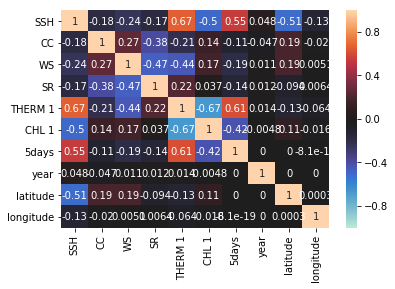

In [14]:
import seaborn as sn

cors = np.corrcoef(np.transpose(data[['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year', 'latitude', 'longitude']]))
sn.heatmap(cors, annot=True, cbar=True, vmin=-1, vmax=1, xticklabels=['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year', 'latitude', 'longitude'], yticklabels=['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year', 'latitude', 'longitude'], center=0)

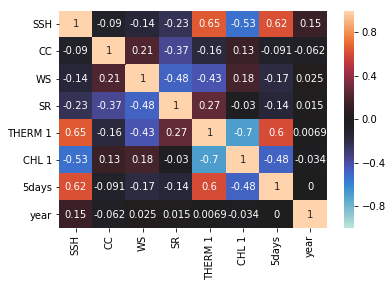

In [13]:
cors = np.corrcoef(np.transpose(dataClean[['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year']]))
sn.heatmap(cors, annot=True, cbar=True, vmin=-1, vmax=1, xticklabels=['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year'], yticklabels=['SSH', 'CC', 'WS', 'SR', 'THERM 1',
                                     'CHL 1','5days', 'year'], center=0)

In [34]:
X_train=dataClean.loc[dataClean['year']!=2008,('CHL 1','THERM 1','SSH','SR','WS')]
X_test=dataClean.loc[dataClean['year']==2008,('CHL 1','THERM 1','SSH','SR','WS')]
# X_train
Y_train=dataClean.loc[dataClean['year']!=2008,['CHL '+ str(i) for i in range(2,19)]]
Y_test=dataClean.loc[dataClean['year']==2008,['CHL '+ str(i) for i in range(2,19)]]

In [64]:
def evaluate(y_pred,y_true):
    return mean_squared_error(y_true,y_pred)
def validate(model, X_train,Y_train):
    fold_evaluation=[]
    for i in range(1992,2008):
        selected = dataClean.loc[dataClean['year']!=2008,'year']!=i 
        model.fit(X_train[selected],Y_train[selected])
        y_pred=model.predict(X_train[np.logical_not( selected ) ])
        fold_evaluation.append(evaluate(y_pred,Y_train[np.logical_not( selected )]))
    fold_evaluation=np.array(fold_evaluation)
    return np.mean(fold_evaluation),np.std(fold_evaluation)

In [65]:
from sklearn.neural_network import MLPRegressor
validate(MLPRegressor(), X_train,Y_train)

(0.015335314288645912, 0.005591051445671298)

In [66]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(X_train)